In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M

sys.path.append(r'G:\My Drive\Berkeley_NEW\MELTS_python_Paula\melts_matlab_git_master\package')

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [2]:
Exp = pd.read_excel('Villiger2007.xlsx')
Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq']

In [3]:
bulk = {'SiO2_Liq': Exp['SiO2_Liq'].loc[0], 
        'TiO2_Liq': Exp['TiO2_Liq'].loc[0], 
        'Al2O3_Liq': Exp['Al2O3_Liq'].loc[0], 
        'FeOt_Liq': Exp['FeOt_Liq'].loc[0], 
        'MnO_Liq': Exp['MnO_Liq'].loc[0], 
        'MgO_Liq': Exp['MgO_Liq'].loc[0], 
        'CaO_Liq': Exp['CaO_Liq'].loc[0], 
        'Na2O_Liq': Exp['Na2O_Liq'].loc[0], 
        'K2O_Liq': Exp['K2O_Liq'].loc[0],
        'P2O5_Liq': 0.0,
        'H2O_Liq': 0.05, 
        'CO2_Liq': 0.0,
       'Fe3Fet_Liq': 0.17}

#49.39	1.53	14.08	0.06	10.25	0.18	10.32	12.05	1.95	0.21	0.17


In [4]:
bulk

{'SiO2_Liq': 48.67,
 'TiO2_Liq': 0.57,
 'Al2O3_Liq': 14.55,
 'FeOt_Liq': 7.56,
 'MnO_Liq': 0.14,
 'MgO_Liq': 14.81,
 'CaO_Liq': 11.73,
 'Na2O_Liq': 1.5,
 'K2O_Liq': 0.08,
 'P2O5_Liq': 0.0,
 'H2O_Liq': 0.05,
 'CO2_Liq': 0.0,
 'Fe3Fet_Liq': 0.17}

In [5]:
Exp[Elements] = 100*Exp[Elements].values/np.nansum(Exp[Elements], axis = 1).reshape(8,1)

In [16]:
# # Results_Holland = M.multi_path(Model = "Holland", comp = bulk,
# #                        T_end_C = 1000, dt_C = 2, 
# #                        P_bar = np.array([4000,7000,18000]), find_liquidus = True,
# #                        H2O_Liq = 0.2,
# #                        Frac_solid = True, Frac_fluid = True,
# #                       fO2_buffer = "NNO", fO2_offset = 0)
 v
    
Results_MELTS = M.multi_path(Model = "MELTSv1.2.0", comp = bulk,
                       T_end_C = 1000, dt_C = 2, 
                       P_bar = np.array([4000, 7000, 10000, 1000]), find_liquidus = True,
                       H2O_Liq = 0.2,
                       Frac_solid = True, Frac_fluid = True,
                      fO2_buffer = "NNO", fO2_offset = 0)

  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 3.0 ... Complete (time taken = 65.24 seconds)


In [17]:
import pickle
with open('Results_MELTS.pck', 'wb') as file_handle:
    pickle.dump(Results_MELTS, file_handle)

In [18]:
with open('Results_MELTS.pck', 'rb') as file_handle:
    Results_MELTS = pickle.load(file_handle)
with open('Results_Holland.pck', 'rb') as file_handle:
    Results_Holland = pickle.load(file_handle)

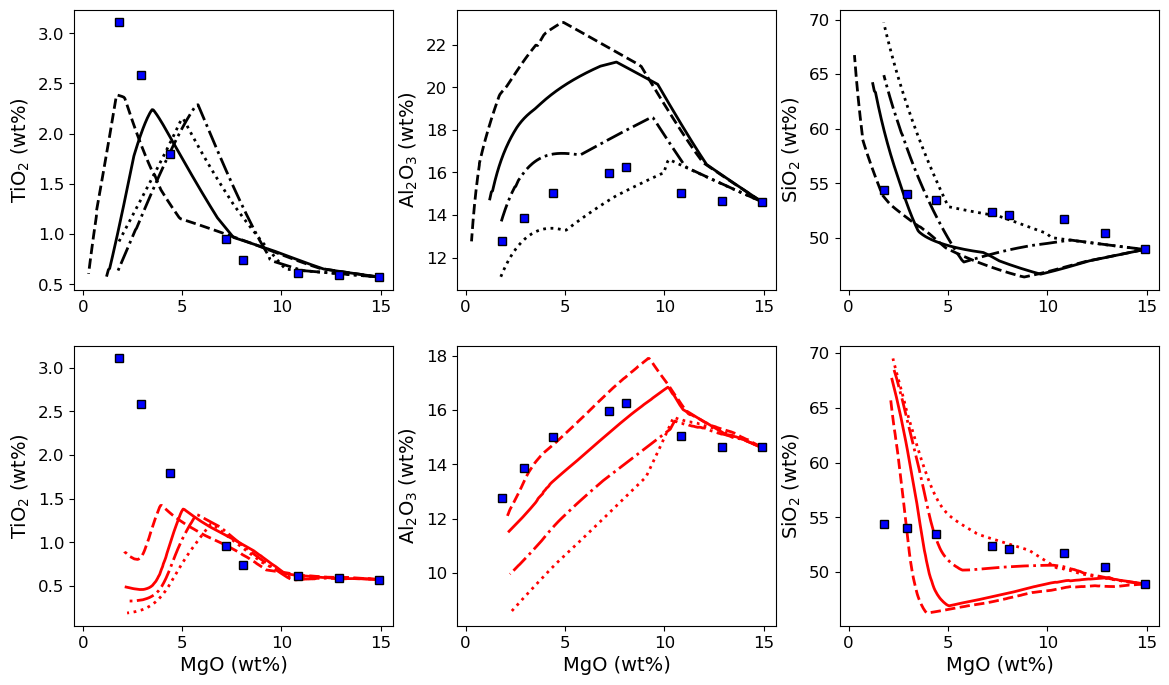

In [26]:
f, a = plt.subplots(2,3, figsize = (14,8), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

for index in Results_Holland:
    Results_Holland[index]['liq'][Elements] = 100*Results_Holland[index]['liq'][Elements].values/np.nansum(Results_Holland[index]['liq'][Elements], axis = 1).reshape(len(Results_Holland[index]['liq']['SiO2_Liq']),1)
    Results_MELTS[index]['All'][Elements] = 100*Results_MELTS[index]['All'][Elements].values/np.nansum(Results_MELTS[index]['All'][Elements], axis = 1).reshape(len(Results_MELTS[index]['All']['SiO2_Liq']),1)
    
for i in range(3):
    a[1][i].plot(Results_Holland['index = 0']['liq']['MgO_Liq'],
             Results_Holland['index = 0']['liq'][y[i]], '-.', linewidth = 2, color = 'r')
    a[1][i].plot(Results_Holland['index = 1']['liq']['MgO_Liq'],
             Results_Holland['index = 1']['liq'][y[i]], '-', linewidth = 2, color = 'r')
    a[1][i].plot(Results_Holland['index = 2']['liq']['MgO_Liq'],
             Results_Holland['index = 2']['liq'][y[i]], '--', linewidth = 2, color = 'r')    
    a[1][i].plot(Results_Holland['index = 3']['liq']['MgO_Liq'],
             Results_Holland['index = 3']['liq'][y[i]], ':', linewidth = 2, color = 'r')    
        
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[1][i].set_ylabel(y[i][:-4] + ' (wt%)')
        
    a[0][i].plot(Results_MELTS['index = 0']['All']['MgO_Liq'],
             Results_MELTS['index = 0']['All'][y[i]], '-.', linewidth = 2, color = 'k')
    a[0][i].plot(Results_MELTS['index = 1']['All']['MgO_Liq'],
             Results_MELTS['index = 1']['All'][y[i]], '-', linewidth = 2, color = 'k')
    a[0][i].plot(Results_MELTS['index = 2']['All']['MgO_Liq'],
             Results_MELTS['index = 2']['All'][y[i]], '--', linewidth = 2, color = 'k')    
    a[0][i].plot(Results_MELTS['index = 3']['All']['MgO_Liq'],
             Results_MELTS['index = 3']['All'][y[i]], ':', linewidth = 2, color = 'k')    

    a[0][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')
    a[0][i].xaxis.set_tick_params(which='both', labelbottom=True)    

    
    a[1][i].set_xlabel('MgO (wt%)')
    
a[1][0].set_ylabel('TiO$_2$ (wt%)')
a[0][0].set_ylabel('TiO$_2$ (wt%)')
a[1][1].set_ylabel('Al$_2$O$_3$ (wt%)')
a[0][1].set_ylabel('Al$_2$O$_3$ (wt%)')
a[1][2].set_ylabel('SiO$_2$ (wt%)')
a[0][2].set_ylabel('SiO$_2$ (wt%)')

plt.savefig("Villiger.png", dpi = 300, bbox_inches='tight')  